Today, we will spend some time on understanding the background of the project and learning about the dataset. This will help inform the rest of the project and make thinking about how to work with the data easier. This is a very important first step of any project.

Here are a few questions to think about in terms of learning about the background of the project:

--------------

DNA to Protein Video: https://www.youtube.com/watch?v=gG7uCskUOrA

# What is Parkinson's Disease?

> A **neurodegenerative disease** that generally affects the elderly (average age = 55).

> Nerve cell damage in the brain causes **low dopamine levels**, affecting movement.

> Common **symptoms** are tremors, shaking, stiffness, difficulty with balance/coordination.

> It's unclear why, but men seem to be more likely to suffer from Parkinson's than women.

> **L-DOPA** is used as a treatment to incrase dopamine levels in the brain.


# What parts of the brain are affected by Parkinson's disease?

> Effects start in the **basal ganglia** (specifically substantia nigra).

> In different stages, **degeneration spreads** throughout the brain.

> Causes a decrease in **dopaminergic neurons**, leading to a drop in dopamine levels.


# What are cells? What are the different types of cells that you find in the brain?

> Cells are the **smallest unit that can live on its own** and that makes up all living organisms and the tissues of the body.

> There are three main parts: the cell membrane, nucleus, and cytoplasm.

> Some **types of cells** are the muscle cell, nerve cell (neurons), blood cells, etc.

> The cells in your eyes are completely different than the cells in the rest of your body (have different function, immune system, connections, etc.).

> **Every cell has the same DNA**, but not every cell has the same set of genes turned on, causing different cell types

# What is the central dogma?

> a theory stating that genetic information only flows in one direction: **DNA --> RNA --> Protein**

> suggests that **DNA contains information to create all of our proteins** and RNA is a messenger that carries information to ribosomes

> **ribosomes** = "factories" in a cell, where information is translated from DNA sequence to function


# What is RNA-seq?

> **RNA sequencing lets us discover more about which genes are expressed (turned on) or suppressed (switched off) at different times in different types of cells.**

> abbreviation of RNA sequencing

> a sequencing technique using next-generation sequencing (NGS) to examine the quantity and sequences of RNA

> analyzes transcriptone (the protein-coding part of an organism's genome) of gene expression

> RNA seq also can tell about **Exons** (expressed genes) and **Introns** (rest of the nuclear material)

> RNA = Ribonucleic acid

> RNA is single stranded and contains **thymine instead of uracil** (compared to DNA)

> RNA base pairs: Adenine (A) & Uracil (U); Cytosine (C) & Guanine (G)

# What is ATAC-seq?

> abbreviation for: Assay for Transposase-Accessible Chromatin with Sequencing

> a popular method for determining chromatin accessibility across the genome

> video explaination: https://youtu.be/uuxpyhGNDsk

# What is single cell sequencing?

> isolating a single cell and analyzing the genetic information from that specific cell (rather than older technology that analyzes multiple cells)

> a relatively new technology that allows sequencing data to be linked back to an individual cell in a sample

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next, we will download the data. All of the raw data is https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE193688. (Scroll to the bottom of the link and see the raw.tar file)

But there is too much data to download all of the data at once. So I've moved some of the data to this google drive: https://drive.google.com/drive/folders/1pKgwQxeIjwfYlq7TsFIaZnLeVxkVwZdH?usp=sharing


In [ ]:
# Install dependencies
!pip install snapatac2
!pip install muon
!pip install scanpy
!pip install AnnData

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=330573182f48baf5f0bf46d12560b215fa07713548527a7a83db4f5f66f6dadc
  Stored in directory: /root/.cache/pip/

Just to get a feel for the data, we can start processing the data using infrastructure built for ATAC-seq/RNA-seq. There has been much software developed to help process and analyze this sort of data. Think about the following questions before moving on:

- What does a cell barcode refer to?
- What is an h5 file?
- What are fragment files?
- What is an ATAC-seq peak?


- How do you filter for low quality cells?

In [ ]:
#Import packages
import snapatac2 as snap
import muon as mu
import anndata as an

So we are gonna try to get a feel for the data using: SnapATAC and ScanPy

First we will try working with the ATAC data.
Try following this tutorial, https://kzhang.org/SnapATAC2/tutorials/pbmc.html
There's some sample starting below.

Here are some starting questions to think about:
- Can you make a graph fo the TSS scores? What is a TSS score?
- Can you filter for low quality cells?
- Can you remove doublets? What is a doublet? Why do we need to remove them?

In [ ]:
# Create data object
fragment_file = 'drive/MyDrive/AI4ALL Project/Data/GSM5818682_YC914_filtered_feature_bc_matrix.h5'
data = snap.pp.import_data(
    fragment_file,
    genome=snap.genome.hg38,
    sorted_by_barcode=False,
)
data

PanicException: ignored

In [ ]:
# Remember to close the object when you are done!
data.close()

In [ ]:
snap.pl.tsse(data, interactive=False)

In [ ]:
%%time
snap.pp.filter_cells(data, min_counts=5000, min_tsse=10, max_counts=100000)
data

In [ ]:
%%time
snap.pp.add_tile_matrix(data)

In [ ]:
snap.pp.select_features(data, n_features=250000)

In [ ]:
%%time
snap.tl.spectral(data)

In [ ]:
%%time
snap.tl.umap(data)

In [ ]:
%%time
snap.pp.knn(data)
snap.tl.leiden(data)

In [ ]:
snap.pl.umap(data, color='leiden', interactive=False, height=500)

Now take a look at the peaks file.
- Can you read in the file as dataframe?
- Can you plot the number of peaks across different chromosomes?
- What is the width of the peaks?


**DAY 2:** Now look at the gene expression file:
Use ScanPy to read in the file and process the data.

Follow this tutorial with your own data:
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [ ]:
!pip install scanpy
!pip3 install leidenalg

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import anndata as an

matrix_file = '/content/drive/MyDrive/AI4ALL Project/Data/GSM5818682_YC914_filtered_feature_bc_matrix.h5'

from google.colab import drive
drive.mount('/content/drive')



import numpy as np
dir_list = np.array(os.listdir('/content/drive/MyDrive/AI4ALL Project/Data/'))[[0,10]]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cells x genes : each entry is how much a single cell is expressing a given gene (how much RNA)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


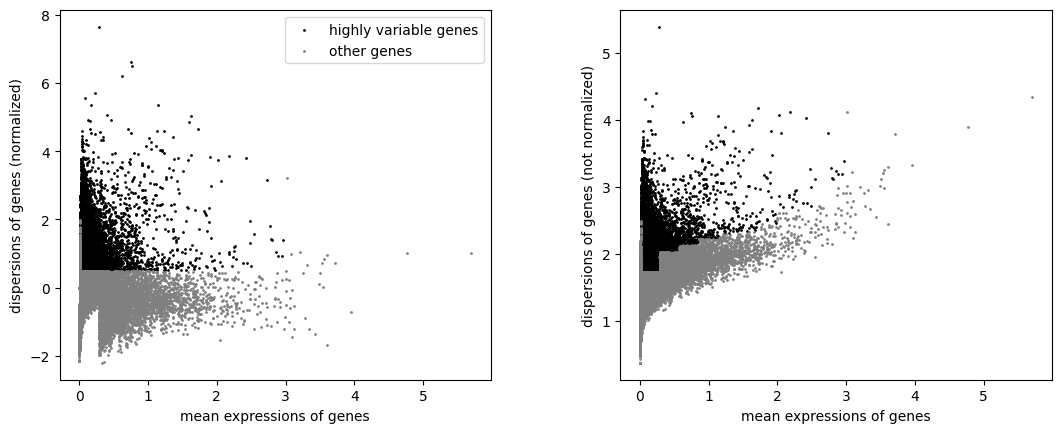

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


In [ ]:
adata = sc.read_10x_h5('/content/drive/MyDrive/AI4ALL Project/Data/' + dir_list[1])#, var_names='gene_symbols')
adata.var_names_make_unique()
# quality control & preprocessing
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)
# focusing on highly variable genes --> more info (giving us POWER to tell 2 cells apart), don't want them to have the lowest expression bc then the differences are inconsequential
# HIGHLY VARIABLE + HIGHLY EXPRESSED GENES

In [ ]:
adata

AnnData object with n_obs × n_vars = 962 × 5207
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [ ]:
# Cells x genes : ---> Cells x 2

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


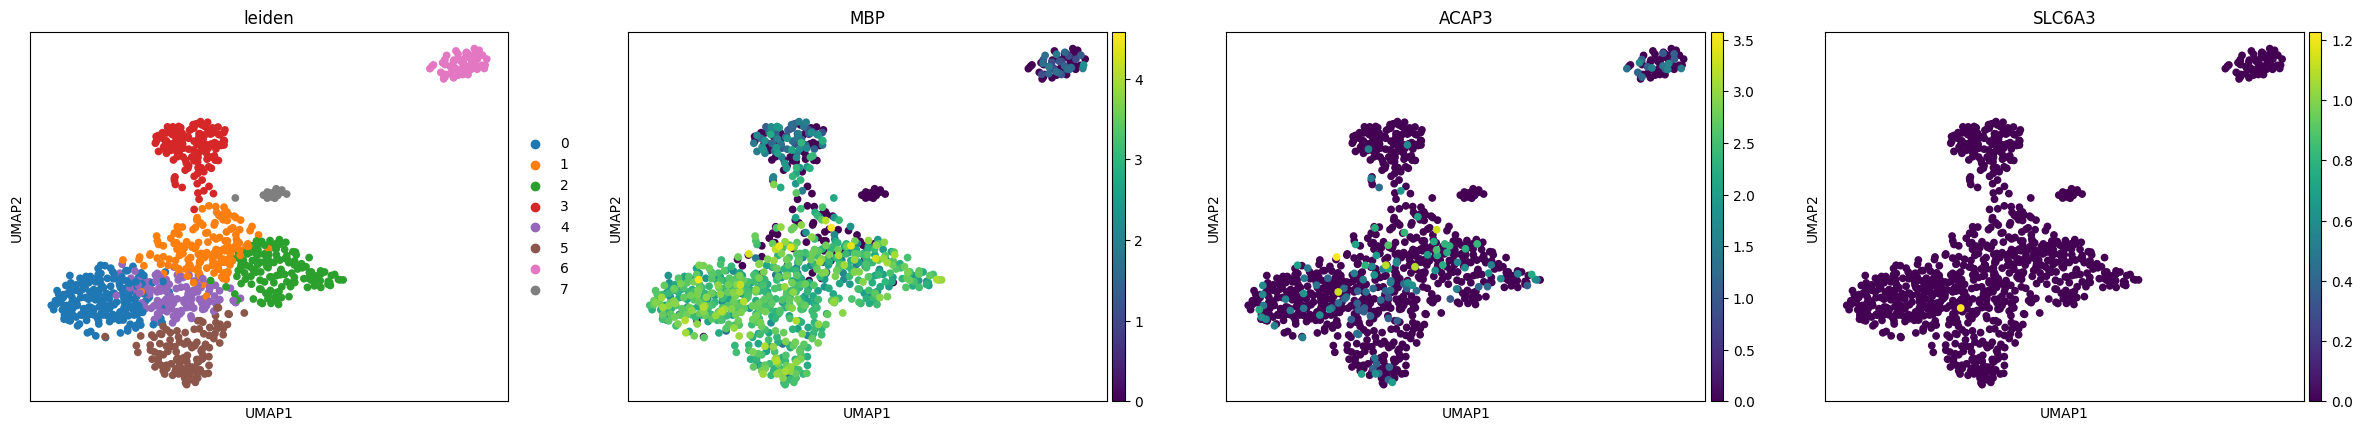

In [ ]:
sc.tl.umap(adata)

sc.pl.umap(adata,color=['leiden','MBP','ACAP3','SLC6A3'])

In [ ]:
adata.var_names

Index(['LINC01409', 'FAM41C', 'KLHL17', 'C1orf159', 'AL390719.3', 'UBE2J2',
       'SCNN1D', 'ACAP3', 'INTS11', 'DVL1',
       ...
       'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5',
       'MT-ND6', 'MT-CYB', 'AC240274.1'],
      dtype='object', length=5207)

In [ ]:
df = adata.to_df()
df['cluster'] = adata.obs.leiden.astype(int)

In [ ]:
# compare gene expression between two clusters
cluster_6 = df[df['cluster'] == 6]
cluster_7 = df[df['cluster'] == 7]
cluster_3 = df[df['cluster'] == 3]

diff_expression = cluster_6.mean() - cluster_3.mean()
diff_expression.sort_values()

## Look up what these genes do! What cells do you think are in 6 and 3

NameError: ignored

In [ ]:
cluster_6.mean() - cluster_3.mean()

NameError: ignored

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# genes with close diff_expressions values increases the mean/accuracy
# genes with farther diff_expressions decreases the mean
dat_6 = cluster_6[['KCNMB2', 'PCDH15', 'ATRNL1', 'VCAN']].to_numpy().reshape(-1,1)
dat_3 = cluster_3[['KCNMB2', 'PCDH15', 'ATRNL1', 'VCAN']].to_numpy().reshape(-1,1)
X = np.concatenate((dat_6,dat_3))
Y = np.concatenate((np.zeros(dat_6.shape), np.ones(dat_3.shape))).squeeze()

# clf = LogisticRegression(random_state=0).fit(X, y)
# clf.predict(X[:2, :])
# clf.predict_proba(X[:2, :])
# clf.score(X, y)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

loo = LeaveOneOut()
correct = []
for i, (train_index, test_index) in enumerate(loo.split(X)):
  clf = LogisticRegression(random_state=0).fit(X[train_index], Y[train_index])
  correct.append(clf.score(X[test_index], Y[test_index]))

print(np.mean(correct))

0.9795918367346939


In [ ]:
X.shape

(195, 1)

In [ ]:
dat_3

array([[ 2.387949  ],
       [ 1.7634305 ],
       [ 2.6617253 ],
       [ 1.5700793 ],
       [ 2.659606  ],
       [ 2.085831  ],
       [ 1.8940071 ],
       [ 3.0814745 ],
       [ 2.965973  ],
       [ 3.1769886 ],
       [ 2.6427884 ],
       [ 2.7309887 ],
       [ 1.6645877 ],
       [ 3.0251796 ],
       [ 2.959549  ],
       [ 1.636357  ],
       [ 2.528941  ],
       [ 2.7772365 ],
       [ 1.6473967 ],
       [ 2.236855  ],
       [ 2.3089101 ],
       [ 2.4093122 ],
       [ 3.0616167 ],
       [ 1.1075217 ],
       [ 2.6008484 ],
       [-0.6642588 ],
       [ 2.1745489 ],
       [ 2.2476082 ],
       [ 1.9244856 ],
       [ 2.6212597 ],
       [ 1.6821142 ],
       [ 2.3293502 ],
       [ 2.5052295 ],
       [ 3.1460252 ],
       [ 2.690673  ],
       [ 1.6453941 ],
       [ 2.5156097 ],
       [ 2.9789102 ],
       [ 2.0483575 ],
       [ 1.5026934 ],
       [ 2.5855777 ],
       [-0.342453  ],
       [ 2.166013  ],
       [ 2.623437  ],
       [ 2.4260497 ],
       [ 1